# Chicago crime analysis

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago. 

* ID: a unique identifier for each observation

* Date: the date the crime occurred

* LocationDescription: the location where the crime occurred

* Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)

* Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)

* Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

* District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

* CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

* Year: the year in which the crime occurred.

* Latitude: the latitude of the location at which the crime occurred.

* Longitude: the longitude of the location at which the crime occurred.

In [1]:
crime_data = read.csv('mvtWeek1.csv')

In [2]:
str(crime_data)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [3]:
nrow(crime_data)

[1] 191641

In [4]:
ncol(crime_data)

[1] 11

In [5]:
max(crime_data$ID)

[1] 9181151

In [6]:
min(crime_data$Beat)

[1] 111

In [7]:
summary(crime_data$Arrest)

   Mode   FALSE    TRUE    NA's 
logical  176105   15536       0 

In [8]:
table(crime_data$Arrest)


 FALSE   TRUE 
176105  15536 

In [9]:
summary(crime_data$LocationDescription =='ALLEY')

   Mode   FALSE    TRUE    NA's 
logical  189333    2308       0 

In [10]:
crime_data$Date[1]

[1] 12/31/12 23:15
131680 Levels: 1/1/01 0:01 1/1/01 0:05 1/1/01 0:30 1/1/01 1:17 ... 9/9/12 9:50

In [11]:
DateConvert = as.Date(strptime(crime_data$Date, "%m/%d/%y %H:%M")) # change string to data

In [12]:
summary(DateConvert)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31" 

In [16]:
crime_data$Month = months(DateConvert)

crime_data$Weekday = weekdays(DateConvert)

crime_data$Date = DateConvert

In [18]:
which.min(table(crime_data$Month))

February 
       4

In [20]:
which.max(table(crime_data$Weekday))

Friday 
     1

In [24]:
table(crime_data$Month, crime_data$Arrest)

           
            FALSE  TRUE
  April     14028  1252
  August    15243  1329
  December  15029  1397
  February  12273  1238
  January   14612  1435
  July      15477  1324
  June      14772  1230
  March     14460  1298
  May       14848  1187
  November  14807  1256
  October   15744  1342
  September 14812  1248

## Visualizing Crime Trends

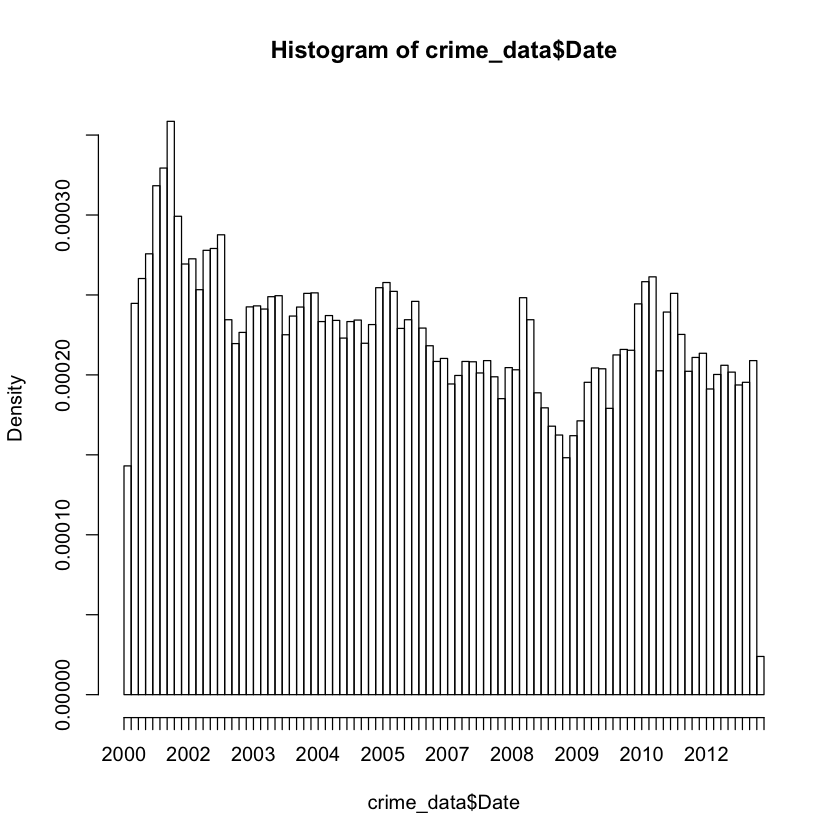

In [25]:
hist(crime_data$Date, breaks=100)

In a boxplot, the bold horizontal line is the median value of the data, the box shows the range of values between the first quartile and third quartile, and the whiskers (the dotted lines extending outside the box) show the minimum and maximum values, excluding any outliers (which are plotted as circles). Outliers are defined by first computing the difference between the first and third quartile values, or the height of the box. This number is called the Inter-Quartile Range (IQR). Any point that is greater than the third quartile plus the IQR or less than the first quartile minus the IQR is considered an outlier.

In [39]:
?boxplot

boxplot {graphics},R Documentation
formula,"a formula, such as y ~ grp, where y is a numeric vector of data values to be split into groups according to the grouping variable grp (usually a factor)."
data,a data.frame (or list) from which the variables in formula should be taken.
subset,an optional vector specifying a subset of observations to be used for plotting.
na.action,a function which indicates what should happen when the data contain NAs. The default is to ignore missing values in either the response or the group.
x,"for specifying data from which the boxplots are to be produced. Either a numeric vector, or a single list containing such vectors. Additional unnamed arguments specify further data as separate vectors (each corresponding to a component boxplot). NAs are allowed in the data."
...,"For the formula method, named arguments to be passed to the default method. For the default method, unnamed arguments are additional data vectors (unless x is a list when they are ignored), and named arguments are arguments and graphical parameters to be passed to bxp in addition to the ones given by argument pars (and override those in pars). Note that bxp may or may not make use of graphical parameters it is passed: see its documentation."
range,"this determines how far the plot whiskers extend out from the box. If range is positive, the whiskers extend to the most extreme data point which is no more than range times the interquartile range from the box. A value of zero causes the whiskers to extend to the data extremes."
width,a vector giving the relative widths of the boxes making up the plot.
varwidth,"if varwidth is TRUE, the boxes are drawn with widths proportional to the square-roots of the number of observations in the groups."
notch,"if notch is TRUE, a notch is drawn in each side of the boxes. If the notches of two plots do not overlap this is ‘strong evidence’ that the two medians differ (Chambers et al, 1983, p. 62). See boxplot.stats for the calculations used."


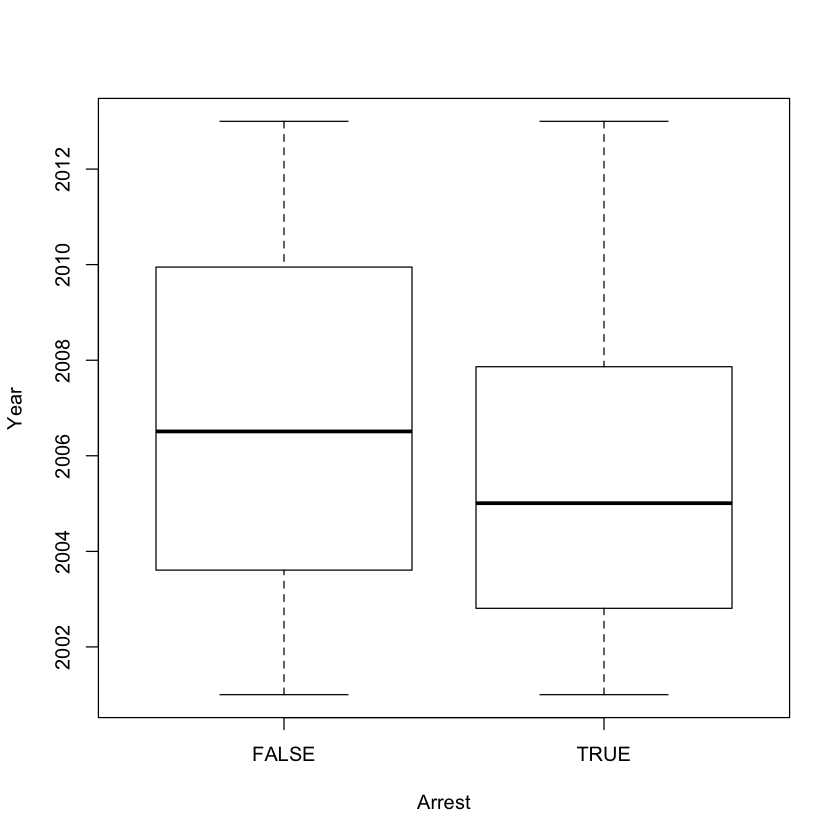

In [46]:
boxplot(crime_data$Date ~ crime_data$Arrest, xlab='Arrest', ylab='Year')

In [48]:
table(crime_data$Year, crime_data$Arrest)

      
       FALSE  TRUE
  2001 18517  2152
  2002 16638  2115
  2003 14859  1798
  2004 15169  1693
  2005 14956  1528
  2006 14796  1302
  2007 13068  1212
  2008 13425  1020
  2009 11327   840
  2010 14796   701
  2011 15012   625
  2012 13542   550

In [49]:
2152/(18517+2152)

[1] 0.1041173

In [50]:
1212/(13068+1212)

[1] 0.08487395

In [51]:
550/(13542+550)


[1] 0.03902924

## Pupular Locations

In [57]:
print(sort(table(crime_data$LocationDescription)))


    AIRPORT BUILDING NON-TERMINAL - SECURE AREA 
                                              1 
                 AIRPORT EXTERIOR - SECURE AREA 
                                              1 
                                ANIMAL HOSPITAL 
                                              1 
                                APPLIANCE STORE 
                                              1 
                                      CTA TRAIN 
                                              1 
                        JAIL / LOCK-UP FACILITY 
                                              1 
                                      NEWSSTAND 
                                              1 
                                         BRIDGE 
                                              2 
              COLLEGE/UNIVERSITY RESIDENCE HALL 
                                              2 
                              CURRENCY EXCHANGE 
                                              2 
                   

In [54]:
(crime_data$LocationDescription)

 Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...


In [68]:
sub_crime_top_loc = subset(crime_data,
                           LocationDescription=='STREET' |
                           LocationDescription=='PARKING LOT/GARAGE(NON.RESID.)' |
                           LocationDescription=='ALLEY' |
                           LocationDescription=='GAS STATION' |
                           LocationDescription=='DRIVEWAY - RESIDENTIAL' 
                           )

In [69]:
nrow(sub_crime_top_loc)

[1] 177510

In [70]:
summary(sub_crime_top_loc$LocationDescription)

ABANDONED BUILDING 
                                              0 
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA 
                                              0 
    AIRPORT BUILDING NON-TERMINAL - SECURE AREA 
                                              0 
             AIRPORT EXTERIOR - NON-SECURE AREA 
                                              0 
                 AIRPORT EXTERIOR - SECURE AREA 
                                              0 
                            AIRPORT PARKING LOT 
                                              0 
 AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA 
                                              0 
                  AIRPORT VENDING ESTABLISHMENT 
                                              0 
                               AIRPORT/AIRCRAFT 
                                              0 
                                          ALLEY 
                                           2308 
                                ANIMAL HOSPITAL 
                                              0 
                                      APARTMENT 
                                              0 
                                APPLIANCE STORE 
                                              0 
                                  ATHLETIC CLUB 
                                              0 
                                           BANK 
                                              0 
                                  BAR OR TAVERN 
                                              0 
                                     BARBERSHOP 
                                              0 
                                  BOWLING ALLEY 
                                              0 
                                         BRIDGE 
                                              0 
                                       CAR WASH 
                                              0 
                                  CHA APARTMENT 
                                              0 
                        CHA PARKING LOT/GROUNDS 
                                              0 
              CHURCH/SYNAGOGUE/PLACE OF WORSHIP 
                                              0 
                                 CLEANING STORE 
                                              0 
                     COLLEGE/UNIVERSITY GROUNDS 
                                              0 
              COLLEGE/UNIVERSITY RESIDENCE HALL 
                                              0 
                   COMMERCIAL / BUSINESS OFFICE 
                                              0 
                              CONSTRUCTION SITE 
                                              0 
                              CONVENIENCE STORE 
                                              0 
                    CTA GARAGE / OTHER PROPERTY 
                                              0 
                                      CTA TRAIN 
                                              0 
                              CURRENCY EXCHANGE 
                                              0 
                                DAY CARE CENTER 
                                              0 
                               DEPARTMENT STORE 
                                              0 
                         DRIVEWAY - RESIDENTIAL 
                                           1675 
                                     DRUG STORE 
                                              0 
                 FACTORY/MANUFACTURING BUILDING 
                                              0 
                                   FIRE STATION 
                                              0 
                                FOREST PRESERVE 
                                              0 
                                    GAS STATION 
                                           2111 
                   GOVERNMENT BUILDING/PROPERTY 
                                              0 
           

In [71]:
# Clean up the LocationDescription (remove all the zeros)

sub_crime_top_loc$LocationDescription = factor(sub_crime_top_loc$LocationDescription)

summary(sub_crime_top_loc$LocationDescription)

ALLEY         DRIVEWAY - RESIDENTIAL 
                          2308                           1675 
                   GAS STATION PARKING LOT/GARAGE(NON.RESID.) 
                          2111                          14852 
                        STREET 
                        156564

In [72]:
table(sub_crime_top_loc$Arrest, sub_crime_top_loc$LocationDescription)

       
         ALLEY DRIVEWAY - RESIDENTIAL GAS STATION
  FALSE   2059                   1543        1672
  TRUE     249                    132         439
       
        PARKING LOT/GARAGE(NON.RESID.) STREET
  FALSE                          13249 144969
  TRUE                            1603  11595

In [73]:
table(sub_crime_top_loc$Weekday, sub_crime_top_loc$LocationDescription)

           
            ALLEY DRIVEWAY - RESIDENTIAL GAS STATION
  Friday      385                    257         332
  Monday      320                    255         280
  Saturday    341                    202         338
  Sunday      307                    221         336
  Thursday    315                    263         282
  Tuesday     323                    243         270
  Wednesday   317                    234         273
           
            PARKING LOT/GARAGE(NON.RESID.) STREET
  Friday                              2331  23773
  Monday                              2128  22305
  Saturday                            2199  22175
  Sunday                              1936  21756
  Thursday                            2082  22296
  Tuesday                             2073  21888
  Wednesday                           2103  22371